In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/test.csv


In [2]:
ross_df = pd.read_csv('../input/rossmann-store-sales/train.csv', low_memory=False)
store_df = pd.read_csv('../input/rossmann-store-sales/store.csv', low_memory=False)
test_df = pd.read_csv('../input/rossmann-store-sales/test.csv', low_memory=False)

In [3]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1017204            a              1         a          a               1900.0   
1017205            a              1         c          c               1880.0   
1017206            a              1         a          c               9260.0   
1017207            a              1         a          c                870.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
...                            ...                       ...     ...   
1017204                        6.0                    2014.0       1   
1017205                        4.0                    2006.0       0   
1017206                        NaN                       NaN       0   
1017207                        NaN                       NaN       0   
1017208                        NaN                       NaN       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                    NaN              NaN               NaN  
1                   13.0           2010.0   Jan,Apr,Jul,Oct  
2                   14.0           2011.0   Jan,Apr,Jul,Oct  
3                    NaN              NaN               NaN  
4                    NaN              NaN               NaN  
...                  ...              ...               ...  
1017204             31.0           2013.0   Jan,Apr,Jul,Oct  
1017205              NaN              NaN               NaN  
1017206              NaN              NaN               NaN  
1017207              NaN              NaN               NaN  
1017208             22.0           2012.0  Mar,Jun,Sept,Dec  

[1017209 rows x 18 columns]

In [4]:
merged_df.shape

(1017209, 18)

In [5]:
merged_test_df = test_df.merge(store_df, how='left', on='Store') 
merged_test_df

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0         c          a               1270.0   
1                  0         a          a              14130.0   
2                  0         a          c              24000.0   
3                  0         a          a               7520.0   
4                  0         a          c               2030.0   
...              ...       ...        ...                  ...   
41083              0         a          a               1900.0   
41084              0         c          c               1880.0   
41085              0         a          c               9260.0   
41086              0         a          c                870.0   
41087              1         d          c               5350.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.0                    2008.0       0   
1                           12.0                    2006.0       1   
2                            4.0                    2013.0       0   
3                           10.0                    2014.0       0   
4                            8.0                    2000.0       0   
...                          ...                       ...     ...   
41083                        6.0                    2014.0       1   
41084                        4.0                    2006.0       0   
41085                        NaN                       NaN       0   
41086                        NaN                       NaN       0   
41087                        NaN                       NaN       1   

       Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                  NaN              NaN               NaN  
1                 14.0           2011.0   Jan,Apr,Jul,Oct  
2                  NaN              NaN               NaN  
3                  NaN              NaN               NaN  
4                  NaN              NaN               NaN  
...                ...              ...               ...  
41083             31.0           2013.0   Jan,Apr,Jul,Oct  
41084              NaN              NaN               NaN  
41085              NaN              NaN               NaN  
41086              NaN              NaN               NaN  
41087             22.0           2012.0  Mar,Jun,Sept,Dec  

[41088 rows x 17 columns]

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [7]:
round(merged_df.describe())

Store  DayOfWeek      Sales  Customers       Open      Promo  \
count  1017209.0  1017209.0  1017209.0  1017209.0  1017209.0  1017209.0   
mean       558.0        4.0     5774.0      633.0        1.0        0.0   
std        322.0        2.0     3850.0      464.0        0.0        0.0   
min          1.0        1.0        0.0        0.0        0.0        0.0   
25%        280.0        2.0     3727.0      405.0        1.0        0.0   
50%        558.0        4.0     5744.0      609.0        1.0        0.0   
75%        838.0        6.0     7856.0      837.0        1.0        1.0   
max       1115.0        7.0    41551.0     7388.0        1.0        1.0   

       SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
count      1017209.0            1014567.0                   693861.0   
mean             0.0               5430.0                        7.0   
std              0.0               7715.0                        3.0   
min              0.0                 20.0                        1.0   
25%              0.0                710.0                        4.0   
50%              0.0               2330.0                        8.0   
75%              0.0               6890.0                       10.0   
max              1.0              75860.0                       12.0   

       CompetitionOpenSinceYear     Promo2  Promo2SinceWeek  Promo2SinceYear  
count                  693861.0  1017209.0         509178.0         509178.0  
mean                     2009.0        1.0             23.0           2012.0  
std                         6.0        0.0             14.0              2.0  
min                      1900.0        0.0              1.0           2009.0  
25%                      2006.0        0.0             13.0           2011.0  
50%                      2010.0        1.0             22.0           2012.0  
75%                      2013.0        1.0             37.0           2013.0  
max                      2015.0        1.0             50.0           2015.0

In [8]:
merged_df.duplicated().sum()

0

In [9]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [10]:
px.histogram(merged_df,
            x='Sales')

In [11]:
merged_df = merged_df[merged_df.Open==1].copy()

In [12]:
px.histogram(merged_df,
            x='Sales')

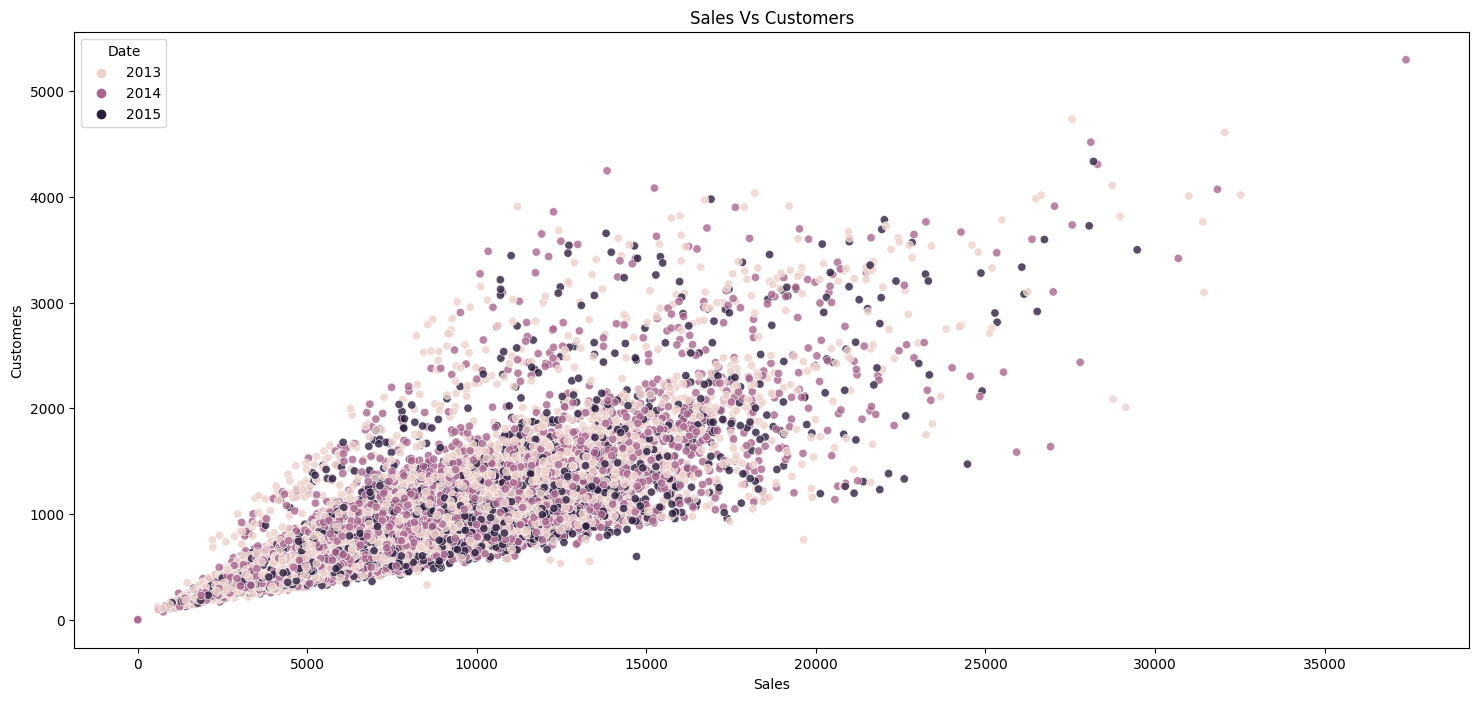

In [13]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

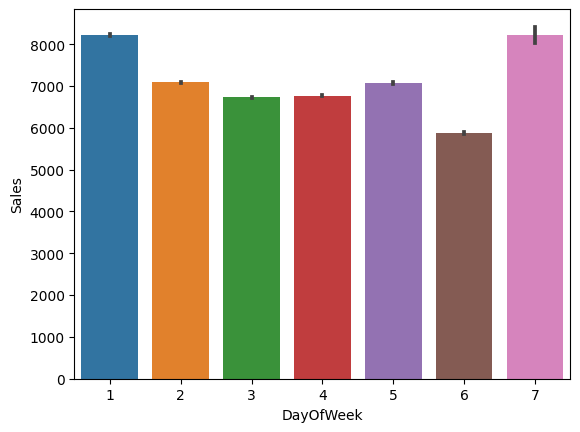

In [14]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

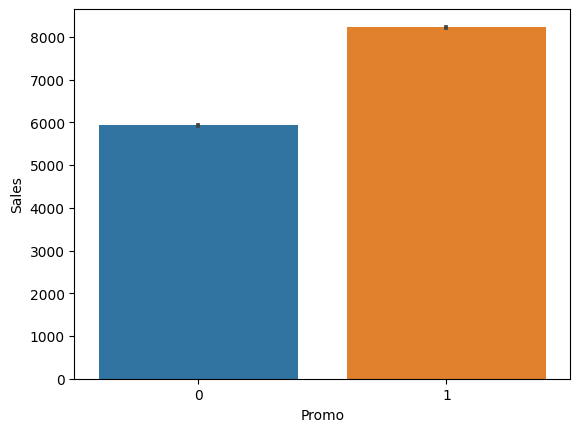

In [15]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

In [16]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [17]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

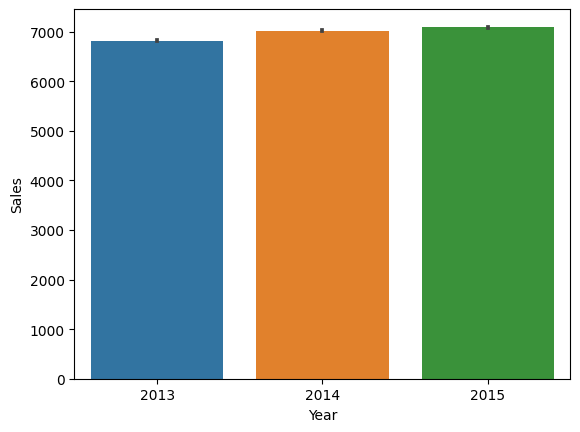

In [18]:
sns.barplot(data=merged_df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

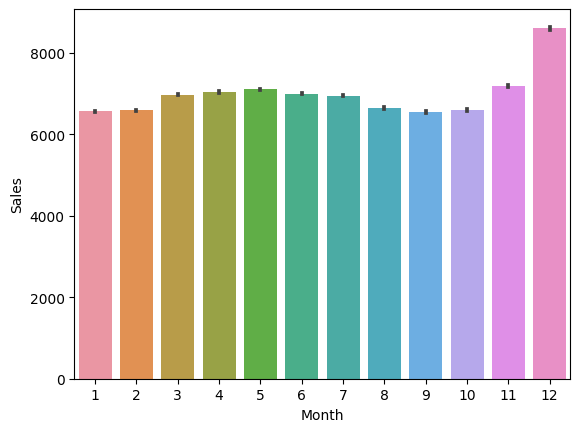

In [19]:
sns.barplot(data=merged_df, x='Month', y='Sales')

In [20]:
train_size = int(.75 * len(merged_df))
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [21]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']
target_col = 'Sales'

In [22]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = merged_test_df[input_cols].copy()

In [23]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

In [24]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [25]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [26]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [27]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [28]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [29]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [30]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [31]:
def try_model(model):
    # Fit the model
    model.fit(X_train, train_targets)
    
    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Compute RMSE
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [33]:
try_model(LinearRegression())

(2741.585342064751, 2817.844267335933)

In [34]:
try_model(Ridge())

(2741.5871950814444, 2817.7784665409868)

In [35]:
try_model(Lasso())

(2741.7143904640566, 2817.9472924045217)

In [36]:
try_model(ElasticNet())

(2879.0432103903954, 2972.6658860503385)

In [37]:
try_model(SGDRegressor())

(2742.1401731000897, 2816.763064958826)

In [38]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [39]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

(0.0, 1559.7378600480247)

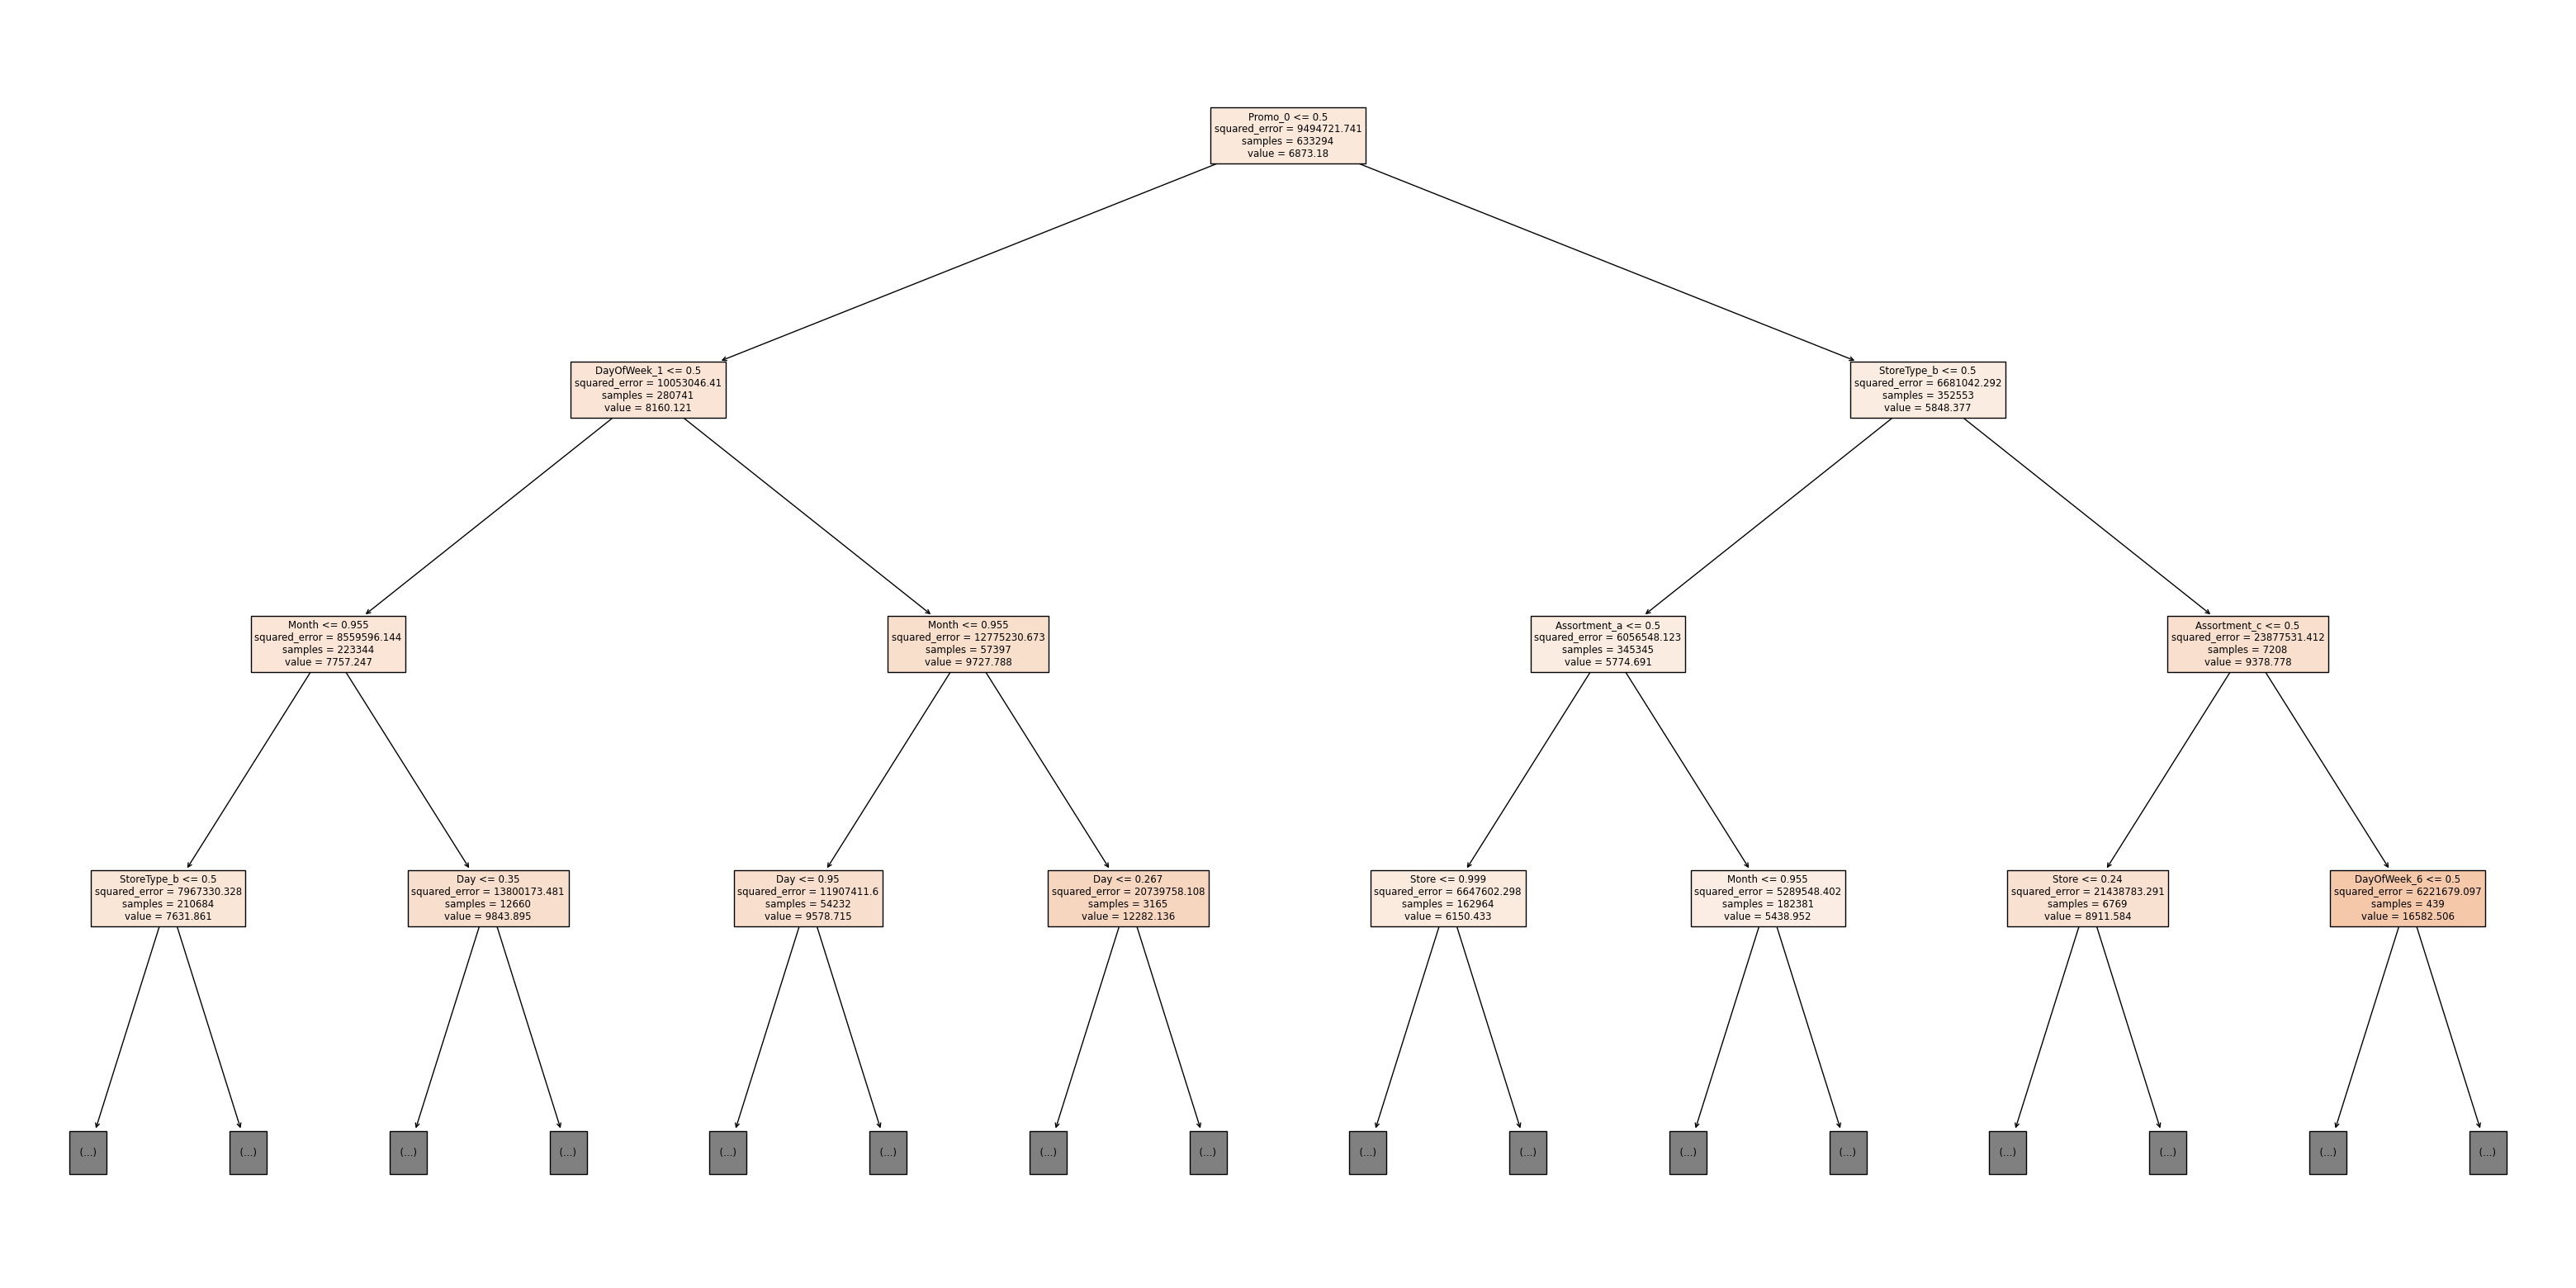

In [40]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

(474.9198974666898, 1371.7321923469985)

In [43]:
rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [44]:
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

feature  importance
0          Store    0.607412
12       Promo_1    0.080520
11       Promo_0    0.058347
1            Day    0.048839
2          Month    0.047125
4    DayOfWeek_1    0.033694
18   StoreType_b    0.022568
20   StoreType_d    0.013995
17   StoreType_a    0.013900
23  Assortment_c    0.012478

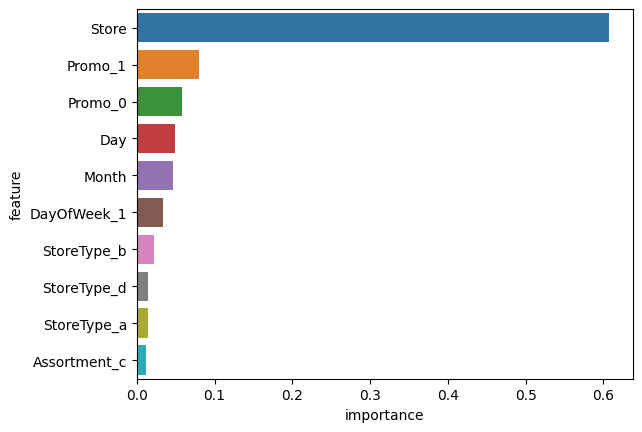

In [45]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [46]:
def predict_input(model, single_input):
    if single_input['Open'] == 0:
        return 0.
    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df.Date)
    input_df['Day'] = input_df.Date.dt.day
    input_df['Month'] = input_df.Date.dt.month
    input_df['Year'] = input_df.Date.dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    return pred

In [47]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [48]:
predict_input(rf, sample_input)

4258.01

In [49]:
test_preds = rf.predict(X_test)
test_preds

array([ 4258.01,  7713.83,  8775.7 , ...,  5954.68, 20823.07,  6748.48])

In [50]:
submission_df = pd.read_csv('../input/rossmann-store-sales/sample_submission.csv')
submission_df['Sales'] = test_preds * test_df['Open'].astype('float')
submission_df.fillna(0, inplace=True)
submission_df.to_csv('submission.csv', index=None)

In [51]:
!head submission.csv

Id,Sales
1,4258.01
2,7713.83
3,8775.7
4,6775.37
5,6492.47
6,5750.74
7,8081.26
8,8166.45
9,5893.82
